In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import StandardScaler
df= pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [9]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
y = sc_y.fit_transform(y.reshape(-1, 1))

In [11]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\Utilisateur2\anaconda3\envs\devRegression_lineaire\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
y_pred = regressor.predict([[8.5]])

In [16]:
y_pred= sc_y.inverse_transform(np.array(y_pred).reshape(1, -1))

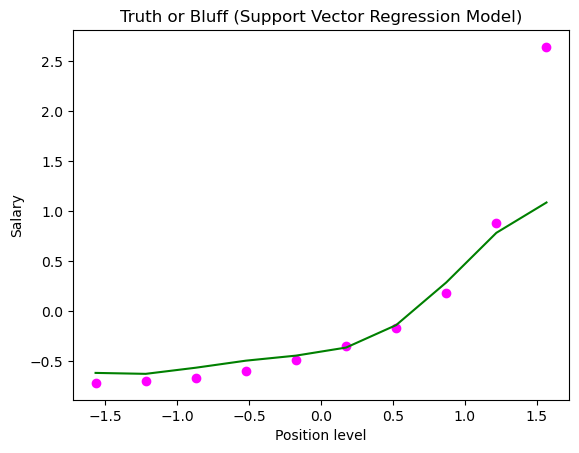

In [17]:
# Visualisation des résultats
plt.scatter(X, y, color='magenta')
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


c:\Users\Utilisateur2\anaconda3\envs\devRegression_lineaire\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


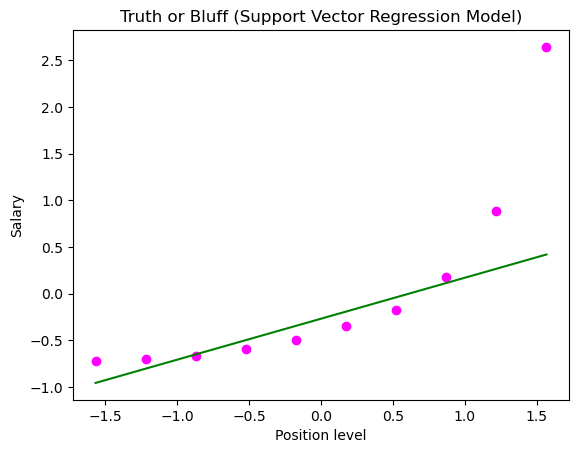

In [19]:
regressor = SVR(kernel='linear')
regressor.fit(X, y)
y_pred = regressor.predict([[8.5]])
y_pred= sc_y.inverse_transform(np.array(y_pred).reshape(1, -1))
# Visualisation des résultats
plt.scatter(X, y, color='magenta')
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


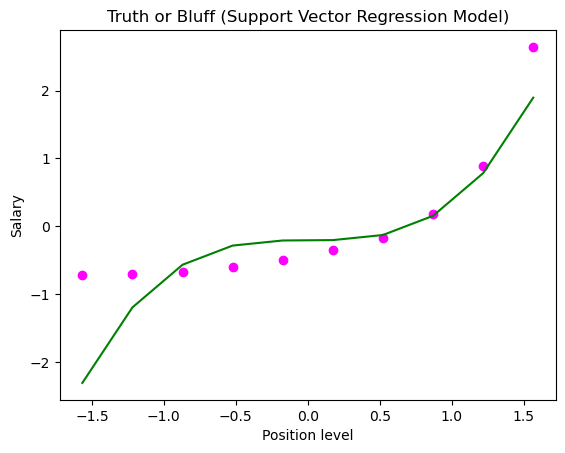

In [22]:
regressor = SVR(kernel='poly')
regressor.fit(X, y)
y_pred = regressor.predict([[8.5]])
y_pred= sc_y.inverse_transform(np.array(y_pred).reshape(1, -1))
# Visualisation des résultats
plt.scatter(X, y, color='magenta')
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



Tableau comparatif des performances:
   Kernel      RMSE
0  linear  0.739066
1     rbf  0.498397
2    poly  0.595514


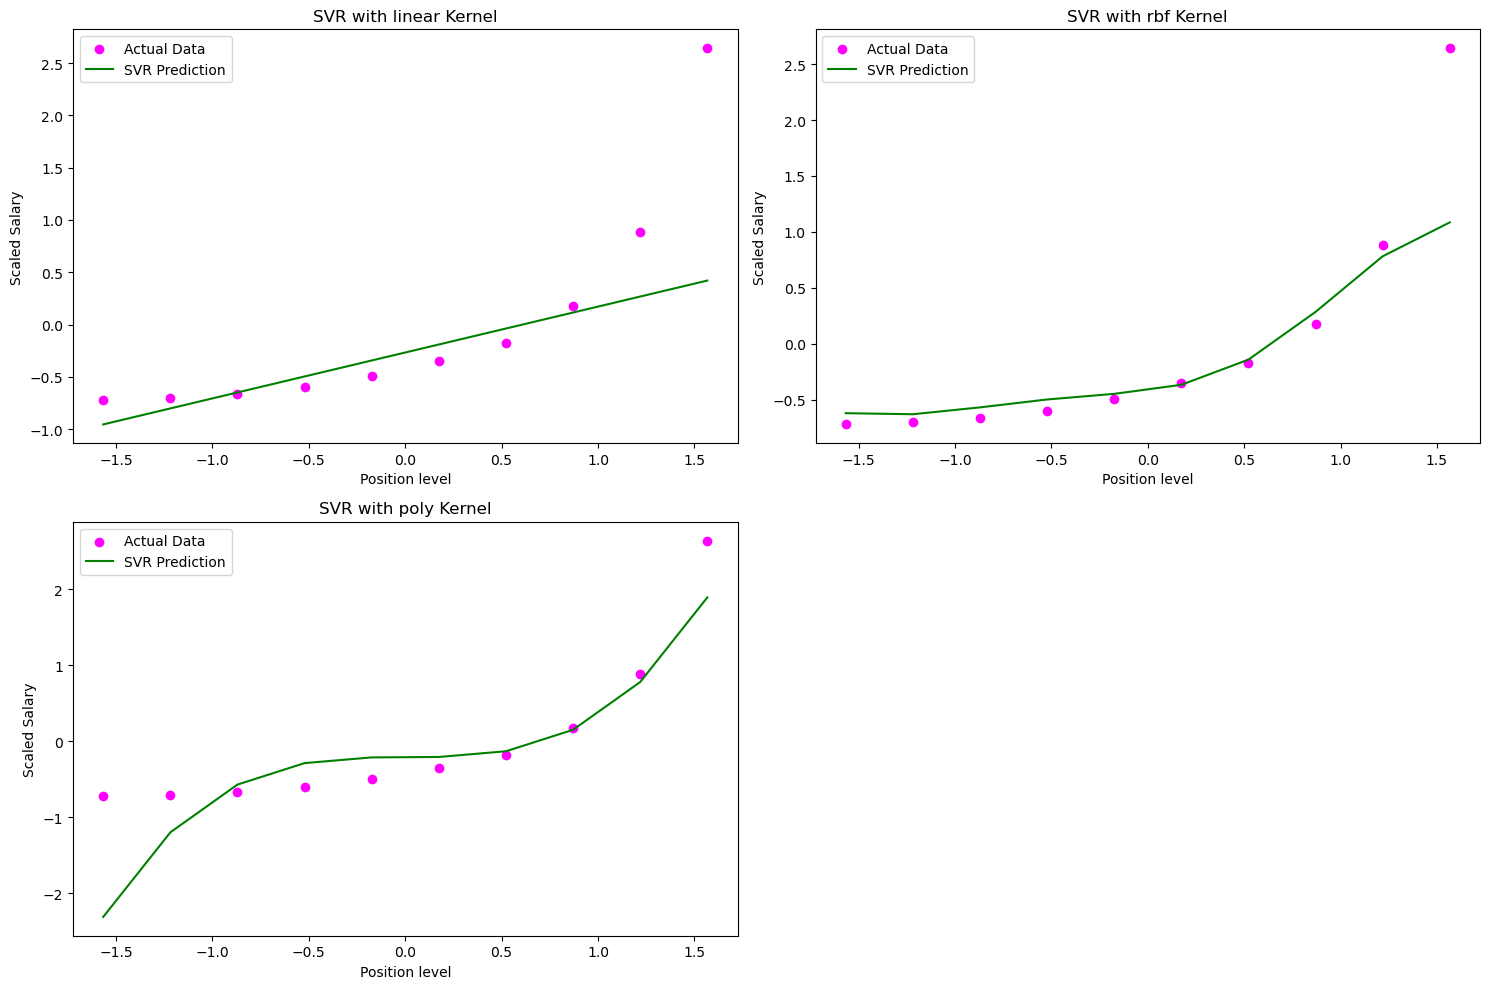

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Charger les données
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

# Initialiser les modèles avec différents noyaux
kernels = ['linear', 'rbf', 'poly']
models = {}

for kernel in kernels:
    regressor = SVR(kernel=kernel)
    regressor.fit(X, y.ravel())
    models[kernel] = regressor

# Visualisation des résultats et comparaison
plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernels, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='magenta', label='Actual Data')
    plt.plot(X, models[kernel].predict(X), color='green', label='SVR Prediction')
    plt.title(f'SVR with {kernel} Kernel')
    plt.xlabel('Position level')
    plt.ylabel('Scaled Salary')
    plt.legend()

# Comparaison des performances dans un tableau
results = {'Kernel': [], 'RMSE': []}

for kernel in kernels:
    y_pred = models[kernel].predict(X)
    rmse = np.sqrt(np.mean((y_pred - y.ravel())**2))
    results['Kernel'].append(kernel)
    results['RMSE'].append(rmse)

results_df = pd.DataFrame(results)
print("\nTableau comparatif des performances:")
print(results_df)

plt.tight_layout()
plt.show()


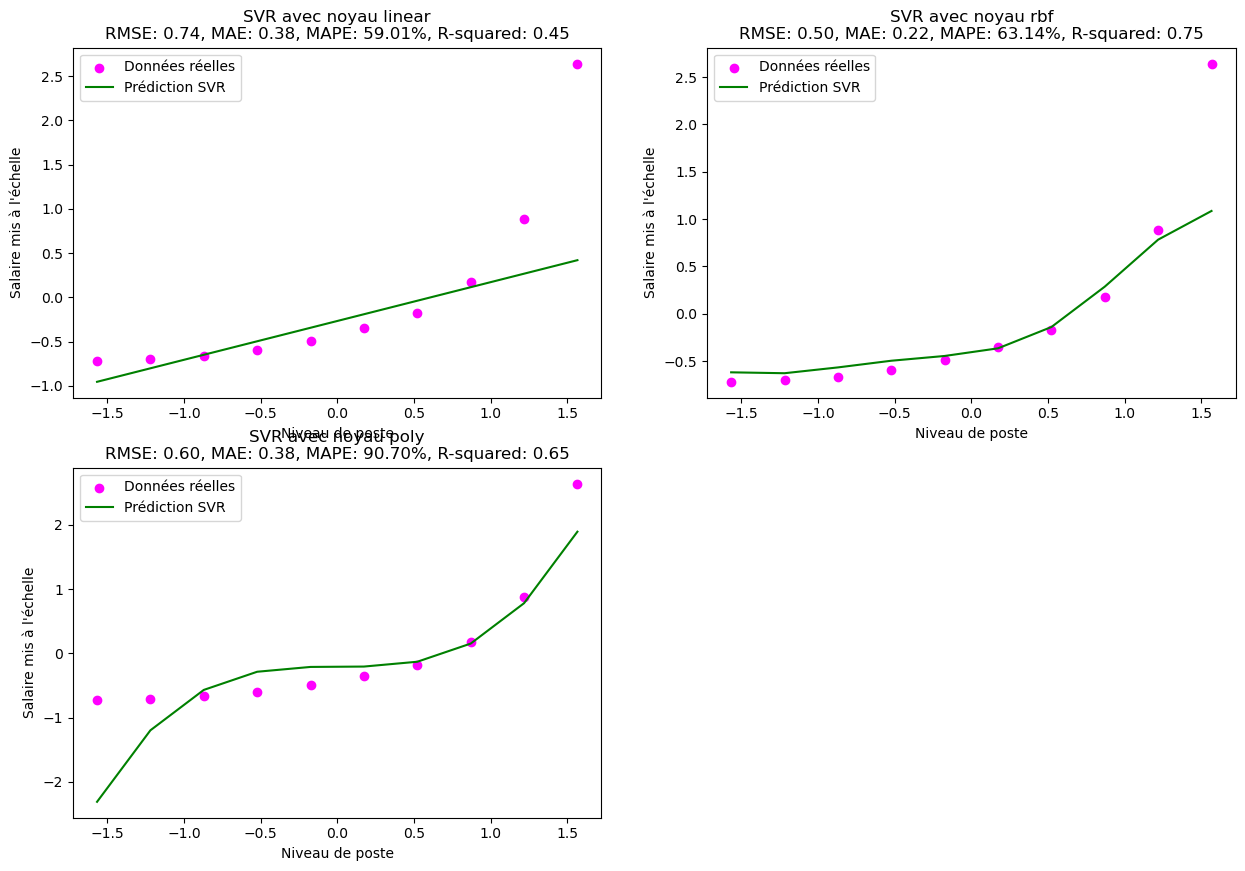

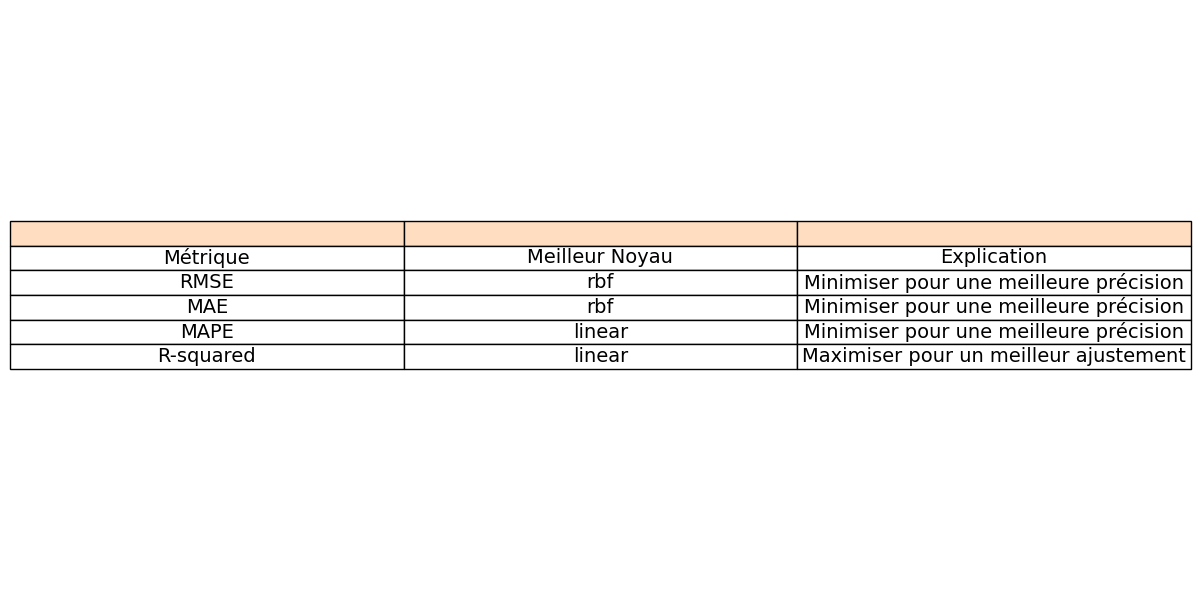

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Charger les données
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Mise à l'échelle des caractéristiques
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

# Initialiser les modèles avec différents noyaux
kernels = ['linear', 'rbf', 'poly']
models = {}

# Métriques de performance
performance_metrics = {'Kernel': [], 'RMSE': [], 'MAE': [], 'MAPE': [], 'R-squared': []}

plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernels, 1):
    # Entraîner le modèle
    regressor = SVR(kernel=kernel)
    regressor.fit(X, y.ravel())
    models[kernel] = regressor
    
    # Prédiction
    y_pred = regressor.predict(X)

    # Calcul des métriques
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    
    # Calcul du MAPE avec protection contre les divisions par zéro
    mape = np.mean(np.abs((y - y_pred) / np.maximum(np.abs(y), 1))) * 100
    
    r_squared = r2_score(y, y_pred)

    # Enregistrement des métriques
    performance_metrics['Kernel'].append(kernel)
    performance_metrics['RMSE'].append(rmse)
    performance_metrics['MAE'].append(mae)
    performance_metrics['MAPE'].append(mape)
    performance_metrics['R-squared'].append(r_squared)

    # Visualisation des résultats
    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='magenta', label='Données réelles')
    plt.plot(X, regressor.predict(X), color='green', label='Prédiction SVR')
    plt.title(f'SVR avec noyau {kernel}\nRMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, R-squared: {r_squared:.2f}')
    plt.xlabel('Niveau de poste')
    plt.ylabel('Salaire mis à l\'échelle')
    plt.legend()

# Affichage des résultats dans un tableau coloré
results_df = pd.DataFrame(performance_metrics)

# Trouver le meilleur modèle en fonction de différentes métriques
best_models = {}
for metric in ['RMSE', 'MAE', 'MAPE', 'R-squared']:
    best_model = results_df[results_df[metric] == results_df[metric].min()]['Kernel'].values[0]
    best_models[metric] = best_model

# Affichage des résultats dans un tableau coloré avec explications
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table_data = [["Métrique", "Meilleur Noyau", "Explication"],
              ["RMSE", best_models['RMSE'], "Minimiser pour une meilleure précision"],
              ["MAE", best_models['MAE'], "Minimiser pour une meilleure précision"],
              ["MAPE", best_models['MAPE'], "Minimiser pour une meilleure précision"],
              ["R-squared", best_models['R-squared'], "Maximiser pour un meilleur ajustement"]]

table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center', colColours=['#FFDDC1', '#FFDDC1', '#FFDDC1'])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.show()
